In [1]:
import geopandas as gpd
import transbigdata as tbd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('taxi_number/Taxi_105', header=None)
data.columns = ['VehicleNum', 'time', 'lng', 'lat', 'Speed', 'Speed', 'OpenStatus']
data

,VehicleNum,time,lng,lat,Speed,Speed,OpenStatus
0,105,2007-02-20 00:00:48,121.4666,31.2208,0,45,0
1,105,2007-02-20 00:01:17,121.4681,31.2211,34,45,0
2,105,2007-02-20 00:01:33,121.4695,31.2216,34,45,0
3,105,2007-02-20 00:01:49,121.4700,31.2216,4,112,0
4,105,2007-02-20 00:02:50,121.4695,31.2215,0,22,0
...,...,...,...,...,...,...,...
1818,105,2007-02-20 23:56:04,121.4830,31.2875,58,45,1
1819,105,2007-02-20 23:57:05,121.4863,31.2878,40,0,1
1820,105,2007-02-20 23:58:06,121.4861,31.2915,8,90,1
1821,105,2007-02-20 23:58:15,121.4861,31.2915,0,90,0


In [3]:
bounds = [121.0, 30.9, 122.0, 32.0]
params = tbd.area_to_params(bounds, accuracy=500, method='rect')

In [4]:
data['LONCOL'], data['LATCOL'] = tbd.GPS_to_grid(data['lng'], data['lat'], params)
data

,VehicleNum,time,lng,lat,Speed,Speed,OpenStatus,LONCOL,LATCOL
0,105,2007-02-20 00:00:48,121.4666,31.2208,0,45,0,89,71
1,105,2007-02-20 00:01:17,121.4681,31.2211,34,45,0,89,71
2,105,2007-02-20 00:01:33,121.4695,31.2216,34,45,0,89,72
3,105,2007-02-20 00:01:49,121.4700,31.2216,4,112,0,89,72
4,105,2007-02-20 00:02:50,121.4695,31.2215,0,22,0,89,71
...,...,...,...,...,...,...,...,...,...
1818,105,2007-02-20 23:56:04,121.4830,31.2875,58,45,1,92,86
1819,105,2007-02-20 23:57:05,121.4863,31.2878,40,0,1,92,86
1820,105,2007-02-20 23:58:06,121.4861,31.2915,8,90,1,92,87
1821,105,2007-02-20 23:58:15,121.4861,31.2915,0,90,0,92,87


In [5]:
dataset = data.groupby(['LONCOL', 'LATCOL'])['VehicleNum'].count().reset_index()
dataset

,LONCOL,LATCOL,VehicleNum
0,66,61,6
1,66,62,2
2,66,63,1
3,67,63,1
4,67,64,1
...,...,...,...
434,152,55,3
435,152,56,6
436,152,57,2
437,152,58,1


In [6]:
dataset['geometry'] = tbd.grid_to_polygon([dataset['LONCOL'], dataset['LATCOL']],params)
dataset

,LONCOL,LATCOL,VehicleNum,geometry
0,66,61,6,POLYGON ((121.34524567940697 31.17204461498858...
1,66,62,2,POLYGON ((121.34524567940697 31.17654122019500...
2,66,63,1,POLYGON ((121.34524567940697 31.18103782540143...
3,67,63,1,POLYGON ((121.35051660581014 31.18103782540143...
4,67,64,1,POLYGON ((121.35051660581014 31.18553443060785...
...,...,...,...,...
434,152,55,3,POLYGON ((121.79854535007873 31.14506498375004...
435,152,56,6,POLYGON ((121.79854535007873 31.14956158895647...
436,152,57,2,POLYGON ((121.79854535007873 31.15405819416289...
437,152,58,1,POLYGON ((121.79854535007873 31.15855479936931...


<AxesSubplot:>

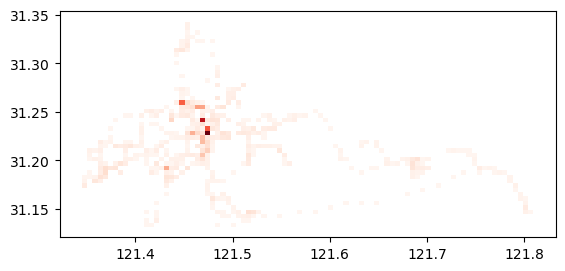

In [7]:
datatest = gpd.GeoDataFrame(dataset)
datatest.plot(column='VehicleNum',cmap='Reds')

In [8]:
time = pd.to_datetime(data['time'])
data = data.set_index(time)
data


,VehicleNum,time,lng,lat,Speed,Speed,OpenStatus,LONCOL,LATCOL
time,,,,,,,,,
2007-02-20 00:00:48,105,2007-02-20 00:00:48,121.4666,31.2208,0,45,0,89,71
2007-02-20 00:01:17,105,2007-02-20 00:01:17,121.4681,31.2211,34,45,0,89,71
2007-02-20 00:01:33,105,2007-02-20 00:01:33,121.4695,31.2216,34,45,0,89,72
2007-02-20 00:01:49,105,2007-02-20 00:01:49,121.4700,31.2216,4,112,0,89,72
2007-02-20 00:02:50,105,2007-02-20 00:02:50,121.4695,31.2215,0,22,0,89,71
...,...,...,...,...,...,...,...,...,...
2007-02-20 23:56:04,105,2007-02-20 23:56:04,121.4830,31.2875,58,45,1,92,86
2007-02-20 23:57:05,105,2007-02-20 23:57:05,121.4863,31.2878,40,0,1,92,86
2007-02-20 23:58:06,105,2007-02-20 23:58:06,121.4861,31.2915,8,90,1,92,87


In [9]:
dateset = pd.DataFrame(data.resample('5T'))
#dateset.iloc[2][1]
dateset

,0,1
0,2007-02-20 00:00:00,VehicleNum ...
1,2007-02-20 00:05:00,VehicleNum ...
2,2007-02-20 00:10:00,VehicleNum ...
3,2007-02-20 00:15:00,VehicleNum ...
4,2007-02-20 00:20:00,VehicleNum ...
...,...,...
283,2007-02-20 23:35:00,VehicleNum ...
284,2007-02-20 23:40:00,VehicleNum ...
285,2007-02-20 23:45:00,VehicleNum ...
286,2007-02-20 23:50:00,VehicleNum ...


In [10]:
dateset.iloc[2][1]

,VehicleNum,time,lng,lat,Speed,Speed,OpenStatus,LONCOL,LATCOL
time,,,,,,,,,
2007-02-20 00:10:48,105,2007-02-20 00:10:48,121.4690,31.2246,20,22,0,89,72
2007-02-20 00:11:49,105,2007-02-20 00:11:49,121.4696,31.2243,0,45,0,89,72
2007-02-20 00:12:11,105,2007-02-20 00:12:11,121.4705,31.2251,18,22,0,89,72
2007-02-20 00:13:12,105,2007-02-20 00:13:12,121.4703,31.2263,0,22,0,89,73
2007-02-20 00:14:07,105,2007-02-20 00:14:07,121.4715,31.2268,26,22,0,89,73
2007-02-20 00:14:33,105,2007-02-20 00:14:33,121.4726,31.2273,12,22,0,90,73


In [11]:
datatest = dateset.iloc[2][1].groupby(['LONCOL', 'LATCOL'])['VehicleNum'].count().reset_index()
datatest

,LONCOL,LATCOL,VehicleNum
0,89,72,3
1,89,73,2
2,90,73,1


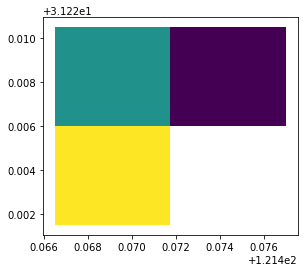

In [12]:
# 生成栅格地理图形
grid = [datatest['LONCOL'], datatest['LATCOL']]
datatest['geometry'] = tbd.grid_to_polygon(grid, params)
# 转为GeoDataFrame
datatest = gpd.GeoDataFrame(datatest)

# 绘制
datatest.plot(column='VehicleNum')
plt.show()

In [63]:
datatest

,LONCOL,LATCOL,VehicleNum,geometry
0,89,71,3,"POLYGON ((121.46648 31.21701, 121.47175 31.217..."
1,89,72,5,"POLYGON ((121.46648 31.22151, 121.47175 31.221..."


In [18]:
datatest.to_csv('real_time load/Taxi_105',index=None)